# SICONFI

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [123]:
s2020 = pd.read_csv('/Users/daianeklein/Documents/Mackenzie/TAC/Data/SICONFI/finbra.csv', encoding = 'latin-1',
                skiprows = 3,error_bad_lines=False, warn_bad_lines = False, sep = ';', decimal = ',')

s2019 = pd.read_csv('/Users/daianeklein/Documents/Mackenzie/TAC/Data/SICONFI/finbra 2.csv', encoding = 'latin-1',
                skiprows = 3,error_bad_lines=False, warn_bad_lines = False, sep = ';', decimal = ',')

s2018 = pd.read_csv('/Users/daianeklein/Documents/Mackenzie/TAC/Data/SICONFI/finbra 3.csv', encoding = 'latin-1',
                skiprows = 3,error_bad_lines=False, warn_bad_lines = False, sep = ';', decimal = ',')

s2017 = pd.read_csv('/Users/daianeklein/Documents/Mackenzie/TAC/Data/SICONFI/finbra 4.csv', encoding = 'latin-1',
                skiprows = 3,error_bad_lines=False, warn_bad_lines = False, sep = ';', decimal = ',')

/Users/daianeklein/miniconda3/envs/ds-projects/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/daianeklein/miniconda3/envs/ds-projects/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [98]:
s2020 = s2020[s2020['Coluna'] == 'Despesas Pagas']
s2020 = s2020[s2020['Conta'] == '12 - Educação']
s2020 = s2020[['Cod.IBGE', 'Valor']]

###

s2019 = s2019[s2019['Coluna'] == 'Despesas Pagas']
s2019 = s2019[s2019['Conta'] == '12 - Educação']
s2019 = s2019[['Cod.IBGE', 'Valor']]

###

s2018 = s2018[s2018['Coluna'] == 'Despesas Pagas']
s2018 = s2018[s2018['Conta'] == '12 - Educação']
s2018 = s2018[['Cod.IBGE', 'Valor']]

###

s2017 = s2017[s2017['Coluna'] == 'Despesas Pagas']
s2017 = s2017[s2017['Conta'] == '12 - Educação']
s2017 = s2017[['Cod.IBGE', 'Valor']]


In [99]:
siconfi = s2020.merge(s2019, how = 'inner',on = 'Cod.IBGE')
siconfi = siconfi.merge(s2018, how = 'inner',on = 'Cod.IBGE')
siconfi = siconfi.merge(s2017, how = 'inner',on = 'Cod.IBGE')

/Users/daianeklein/miniconda3/envs/ds-projects/lib/python3.9/site-packages/pandas/core/frame.py:9191: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Valor_x'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


In [100]:
cols = ['cod', '2020', '2019', '2018', '2017']
siconfi.columns = cols

,index,total
0,2020,1.567207e+11
1,2019,1.604881e+11
2,2018,1.483259e+11
3,2017,1.393095e+11


<Figure size 864x216 with 0 Axes>

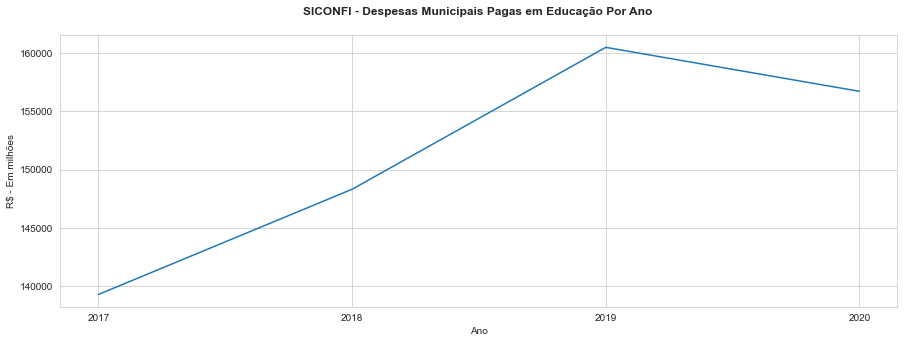

In [120]:
def plotar_grafico():
    sns.set_style("whitegrid")
    
    plt.figure(figsize = (12, 3))
    aux = pd.DataFrame(siconfi[['2020', '2019', '2018', '2017']].sum()).reset_index().rename(columns={0 : 'total'}).sort_values(by='index')
    aux['total'] = aux['total'] / 1000000
    
    plt.figure(figsize = (15, 5));
    ax = sns.lineplot(data = aux, x = 'index', y = 'total', palette = 'Blues');
    plt.title('SICONFI - Despesas Municipais Pagas em Educação Por Ano ', fontsize = 12, weight = 'semibold', pad = 20);
    plt.ylabel('R$ - Em milhões');
    plt.xlabel('Ano');

plotar_grafico()



In [125]:
s2020['Coluna'].value_counts()

Despesas Empenhadas                            254089
Despesas Liquidadas                            253505
Despesas Pagas                                 252969
Inscrição de Restos a Pagar Processados        114440
Inscrição de Restos a Pagar Não Processados     87610
Name: Coluna, dtype: int64